# Import libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
conn = sqlite3.connect('jobs.db')

query = "SELECT * FROM jobs_cleaned_table WHERE (job_group='Data Scientist' OR job_group='Data Analyst' OR job_group='Data Engineer')"
df = pd.read_sql_query(query,conn)

df['date_posted'] = pd.to_datetime(df['date_posted'].str.split().str[0], errors='coerce').dt.strftime('%Y-%m-%d')

conn.close()

# EDA

In [3]:
df.head()

,id,site,job_url,job_url_direct,title,company,date_posted,level,job_group,remote,...,country,city_state,max_salary,min_salary,mean_salary,skills,experience,education,programming_languages,languages
0,in-9936bd8d30f8a34d,indeed,https://www.indeed.com/viewjob?jk=9936bd8d30f8...,https://jobs.vccs.edu/postings/79840,Data Analyst,Virginia Community College System,2024-12-11,Mid-Level,Data Analyst,On Site,...,US,"Chesterfield,VA",78000.0,61000.0,69500.0,"Bachelor, SQL",2,Bachelor,SQL,
1,in-65c826860da559a3,indeed,https://www.indeed.com/viewjob?jk=65c826860da5...,https://jobs.colgate.com/job/Piscataway-Data-A...,Data Analytics Internship,Colgate-Palmolive,2024-12-11,Junior,Data Analyst,Hybrid,...,US,"Piscataway,NJ",58880.0,42320.0,50600.0,"Master, Bachelor, SQL, Python",0,Master,"SQL, Python",
2,in-0123143eb77645f8,indeed,https://www.indeed.com/viewjob?jk=0123143eb776...,https://grnh.se/0be7ee141us,Financial Data Analyst,EquipmentShare,2024-12-11,Mid-Level,Data Analyst,Remote,...,US,"Columbia,MO",86876.0,68611.0,77743.5,"Python, Bachelor, SQL, PowerPoint, Excel, R",3,Bachelor,"Python, SQL, R",
3,in-679b46dfdbe7b4ea,indeed,https://www.indeed.com/viewjob?jk=679b46dfdbe7...,https://grnh.se/de2a9b121us,"Data Analyst, Customer Operations",Squarespace,2024-12-11,Mid-Level,Data Analyst,Hybrid,...,US,"New York,NY",138000.0,85500.0,111750.0,"Python, SQL, Looker, R",2,None,"Python, SQL, R",
4,in-506a48e047b0e57c,indeed,https://www.indeed.com/viewjob?jk=506a48e047b0...,http://www.indeed.com/job/data-analyst-employe...,Data Analyst (Employee Benefits),GBS Benefits,2024-12-11,Mid-Level,Data Analyst,Hybrid,...,US,"South Salt Lake,UT",74386.0,58746.0,66566.0,"Bachelor, Excel",0,Bachelor,,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1679 non-null   object 
 1   site                   1679 non-null   object 
 2   job_url                1679 non-null   object 
 3   job_url_direct         1679 non-null   object 
 4   title                  1679 non-null   object 
 5   company                1653 non-null   object 
 6   date_posted            1679 non-null   object 
 7   level                  1679 non-null   object 
 8   job_group              1679 non-null   object 
 9   remote                 1679 non-null   object 
 10  city                   1449 non-null   object 
 11  state                  1516 non-null   object 
 12  country                1648 non-null   object 
 13  city_state             1449 non-null   object 
 14  max_salary             1531 non-null   float64
 15  min_

In [5]:
df.describe(include='all')

,id,site,job_url,job_url_direct,title,company,date_posted,level,job_group,remote,...,country,city_state,max_salary,min_salary,mean_salary,skills,experience,education,programming_languages,languages
count,1679,1679,1679,1679,1679,1653,1679,1679,1679,1679,...,1648,1449,1531.000000,1531.000000,1531.000000,1679,1679.000000,1150,1679,1679
unique,1679,1,1679,1599,1068,1025,71,4,3,3,...,1,453,NaN,NaN,NaN,1225,NaN,4,122,12
top,in-9936bd8d30f8a34d,indeed,https://www.indeed.com/viewjob?jk=9936bd8d30f8...,https://intonenetworks.com/careers-at-intone,Data Engineer,Amazon.com,2024-12-10,Mid-Level,Data Engineer,On Site,...,US,"New York,NY",NaN,NaN,NaN,Bachelor,NaN,Bachelor,,
freq,1,1679,1,14,135,94,195,989,663,908,...,1648,89,NaN,NaN,NaN,53,NaN,633,404,1610
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,146602.506858,104676.729589,125639.618223,NaN,3.945801,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56354.458212,33643.605431,42621.890718,NaN,3.373463,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19159.000000,10388.000000,14773.500000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,110400.000000,81874.500000,99784.250000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,139586.000000,102317.000000,122931.500000,NaN,3.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,175900.000000,124404.500000,150150.750000,NaN,5.000000,NaN,NaN,NaN


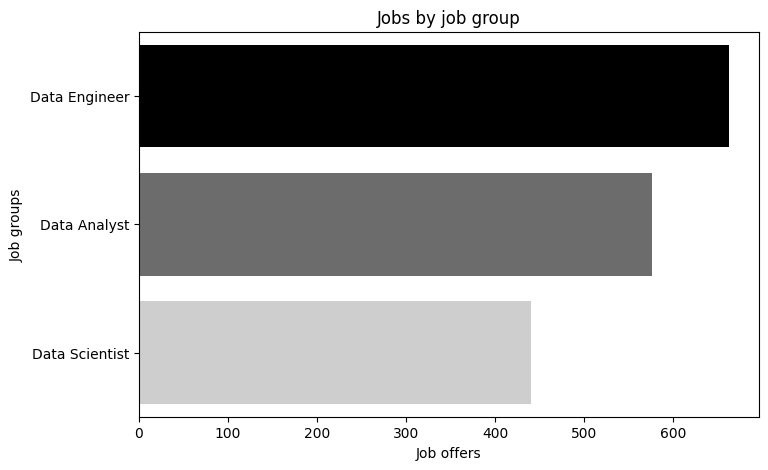

In [6]:
job_groups_counts = df['job_group'].value_counts()

def plot_bars(x,y,figsize=(8,5),title=None,xlabel=(None),ylabel=(None),palette=None):

    plt.figure(figsize=figsize)
    cmap = plt.cm.get_cmap(palette).reversed()
    palette = [cmap(x) for x in np.linspace(0,0.7,len(job_groups_counts))]

    sns.barplot(x=x,y=y,palette=palette)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_bars(x=job_groups_counts.values,y=job_groups_counts.index,title='Jobs by job group',xlabel='Job offers',ylabel='Job groups',palette='Greys')

# Analysis

## Location

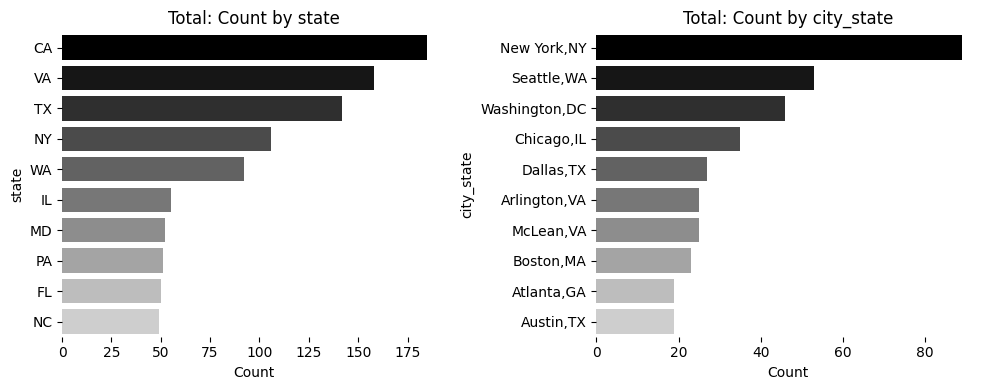

In [ ]:
def plot_multiple_bars(columns,category=None,figsize=(10,12),count_percentage=False,x_y=False,top_10=False,list_values=False,aggregate_column=None):

    rows = df[category].unique() if category is not None else ['Total']
    n_rows, n_cols = len(rows), len(columns)

    fig, axes = plt.subplots(n_rows,n_cols,figsize=figsize,squeeze=False)

    category_palettes = {
        'Data Analyst': 'Blues',
        'Data Engineer': 'Reds',
        'Data Scientist': 'Greens'
    }

    for i, row in enumerate(rows):
        group_data = df[df[category] == row] if category is not None else df

        for j, column in enumerate(columns):

            if aggregate_column is None:
                if top_10 and list_values is False:
                    column_top = group_data[column].value_counts().head(10)
            
                elif list_values is not False and top_10 is None:
                    column_top=(group_data[column].str.split(', ').explode()
                                .value_counts()
                                .dropna()
                                .sort_values(ascending=False))
                    column_top = column_top.drop(labels='',errors='ignore')
                
                elif list_values is not False and top_10 is not None:
                    column_top=(group_data[column].str.split(', ').explode()
                                .value_counts()
                                .dropna()
                                .sort_values(ascending=False).head(10))
                    column_top = column_top.drop(labels='',errors='ignore')
                
                else:
                    column_top = group_data[column].value_counts()
            
            else:
                grouped =(
                    group_data.explode(column)
                    .groupby(column)[aggregate_column]
                    .mean()
                    .sort_values(ascending=False)
                )

                if list_values:
                    group_data = group_data.reset_index(drop=True)
                    grouped = pd.DataFrame({
                        column: group_data[column].str.split(', ').explode(),
                        aggregate_column: group_data[aggregate_column]
                    })
                    grouped = grouped.groupby(column)[aggregate_column].mean().sort_values(ascending=False)

                if '' in grouped.index:
                    grouped = grouped.drop('')
                
                column_top = grouped.head(10) if top_10 else grouped

            ax = axes[i,j]
            total = group_data[column].count()

            for spine in ax.spines.values():
                spine.set_visible(False)

            if category is not None:
                palette = category_palettes.get(row,'Blues')
                cmap = plt.cm.get_cmap(palette).reversed()
                palette = [cmap(x) for x in np.linspace(0,0.7,len(column_top))]

            else:
                cmap = plt.cm.get_cmap('Greys').reversed()
                palette = [cmap(x) for x in np.linspace(0,0.7,len(column_top))]

            kwargs ={
                'y':column_top.values,
                'x':column_top.index
            } if x_y else {
                'x':column_top.values,
                'y':column_top.index
            }

            sns.barplot(ax=ax,palette=palette, **kwargs)

            aggregate_label = 'Count' if aggregate_column is None else f'Avg{aggregate_column}'
            ax.set_title(f'{row}: {aggregate_label} by {column}')
            ax.set_xlabel(aggregate_label if not x_y else column)
            ax.set_ylabel(column if not x_y else aggregate_label)

            if count_percentage:
                for k, value in enumerate(column_top.values):
                    percentage = value/total*100
                    annotation_kwargs = {
                        'text': f'{value:.1f}({percentage:.1f}%)',
                        'xy':(k, value) if x_y else (value,k),
                        'xytext': (-30,5) if x_y else (5,0),
                        'textcoords': 'offset points',
                        'va':'center',
                        'ha':'left',
                        'fontsize':10,
                        'color':'black'
                    }
                    ax.annotate(**annotation_kwargs)
            
    plt.tight_layout()
    plt.show()

columns_location = ['state','city_state']

plot_multiple_bars(columns_location,figsize=(10,4),top_10=True)           
                

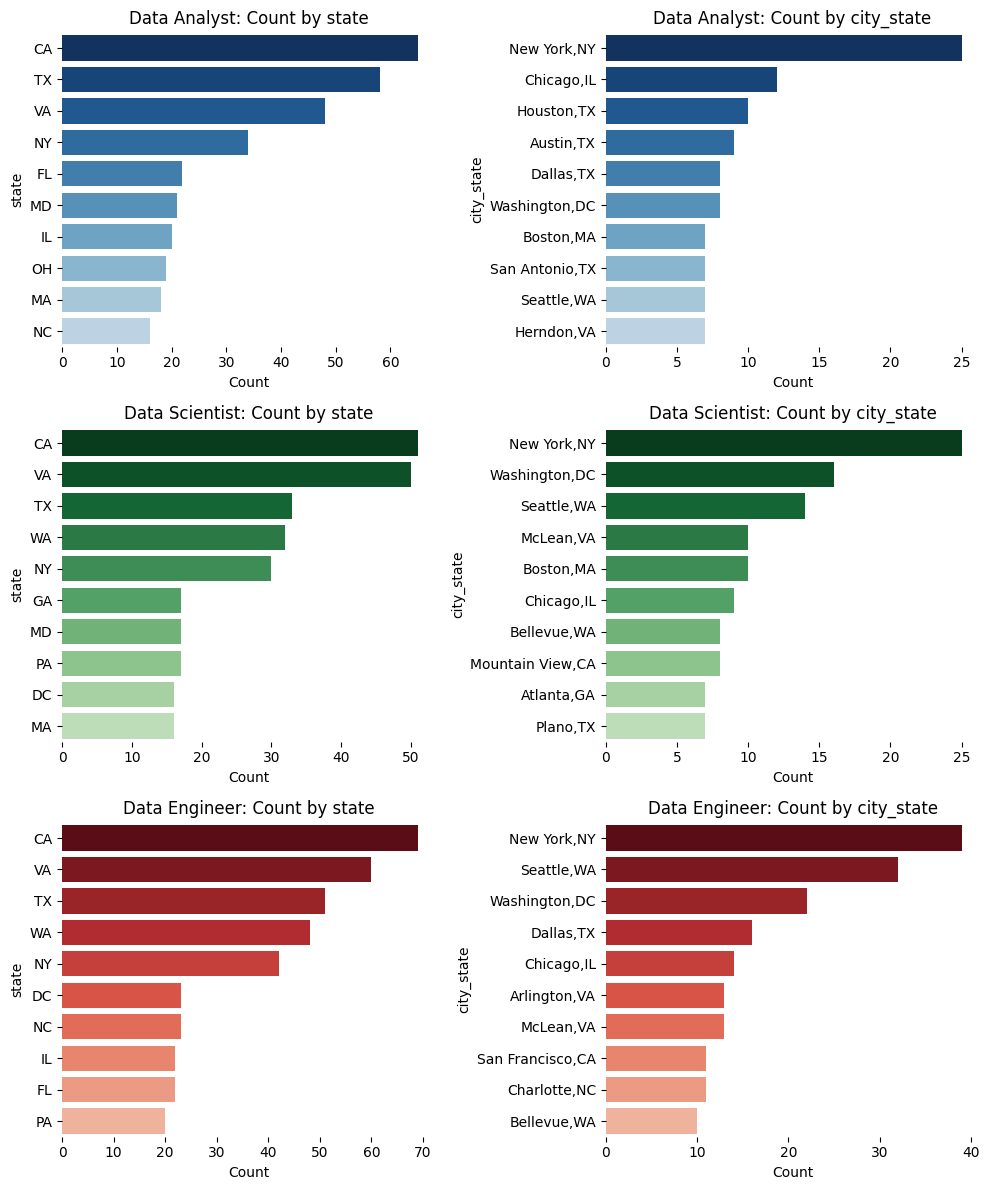

In [8]:
plot_multiple_bars(columns_location,category='job_group',figsize=(10,12),top_10=True)

## Level

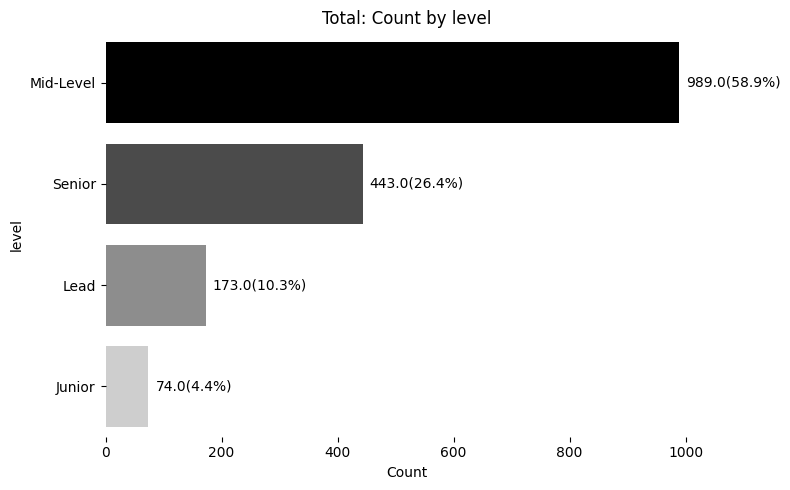

In [13]:
columns_level = ('level',)

plot_multiple_bars(columns_level,figsize=(8,5),count_percentage=True) 

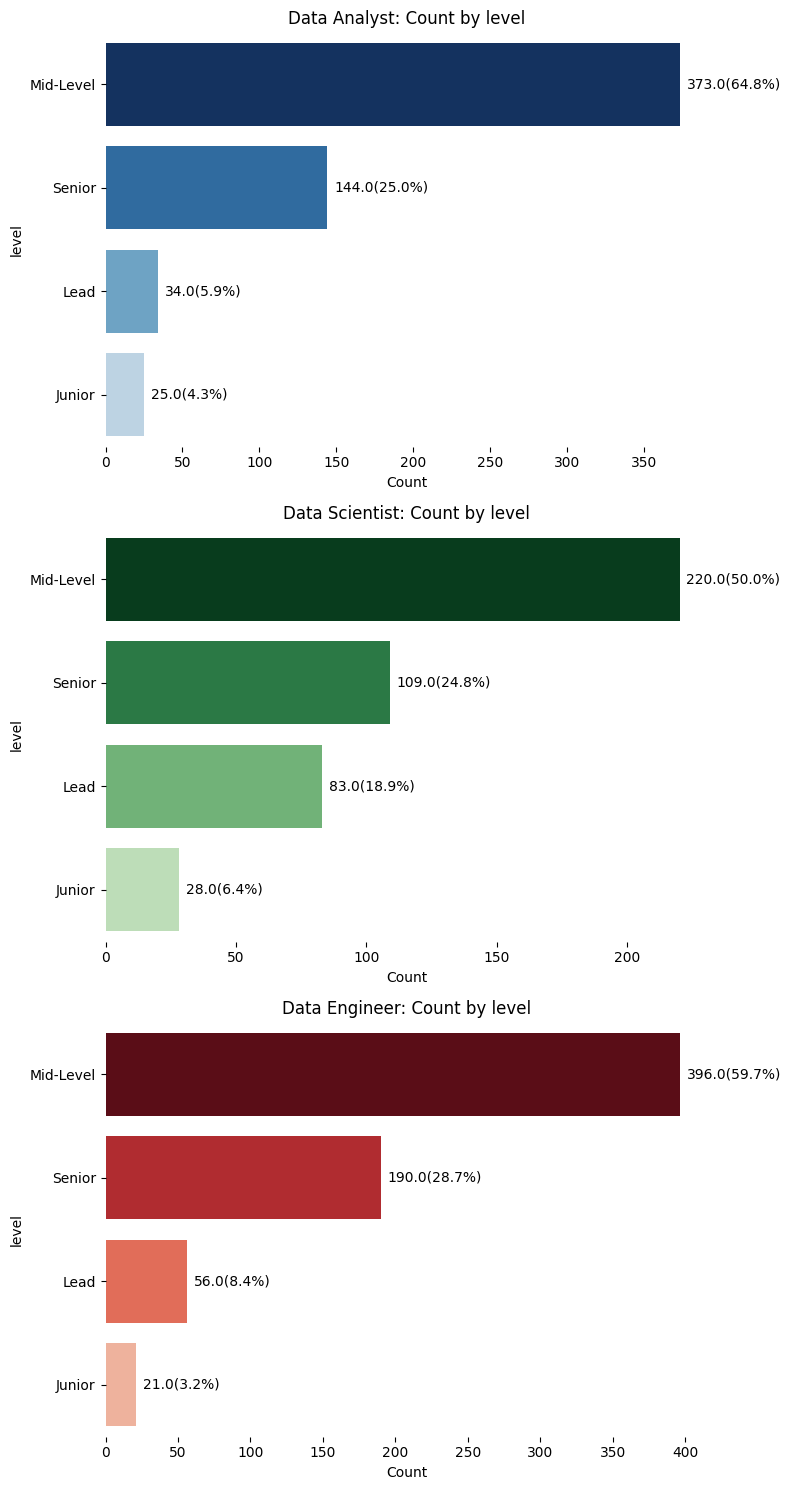

In [ ]:
plot_multiple_bars(columns_level,category='job_group',figsize=(8,15),count_percentage=True)

## Experience

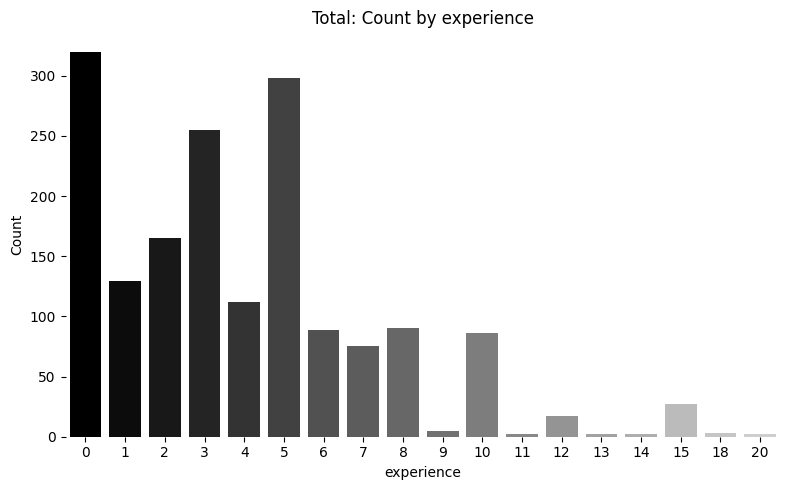

In [15]:
columns_experience = ('experience',)

plot_multiple_bars(columns_experience,figsize=(8,5),x_y=True)

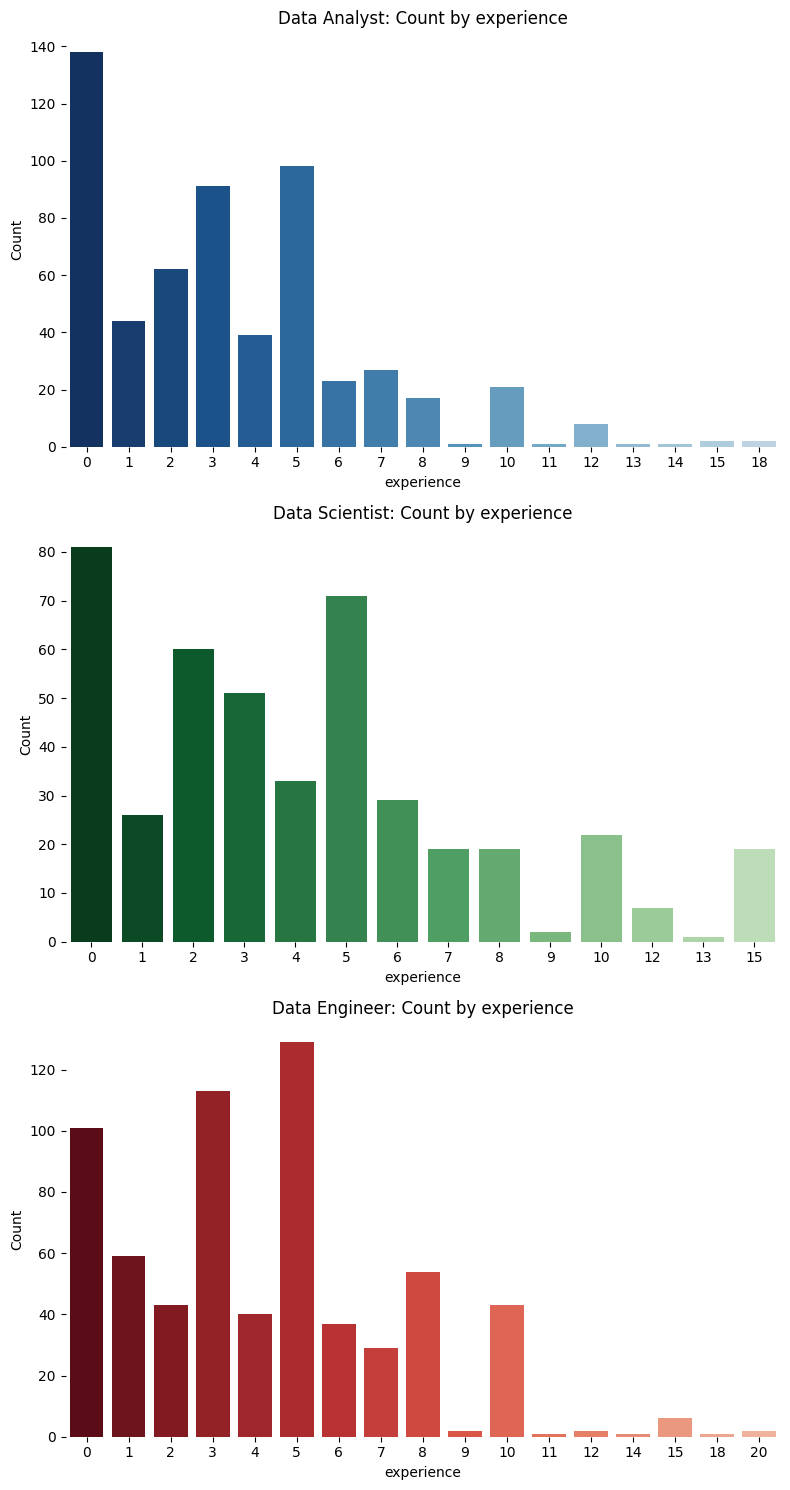

In [16]:
plot_multiple_bars(columns_experience,category='job_group',figsize=(8,15),x_y=True)

## Education

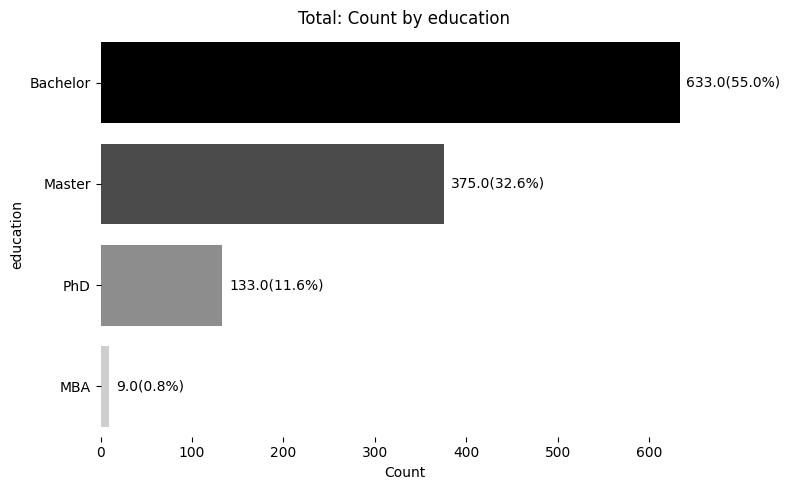

In [17]:
columns_education = ('education',)

plot_multiple_bars(columns_education,figsize=(8,5),count_percentage=True)

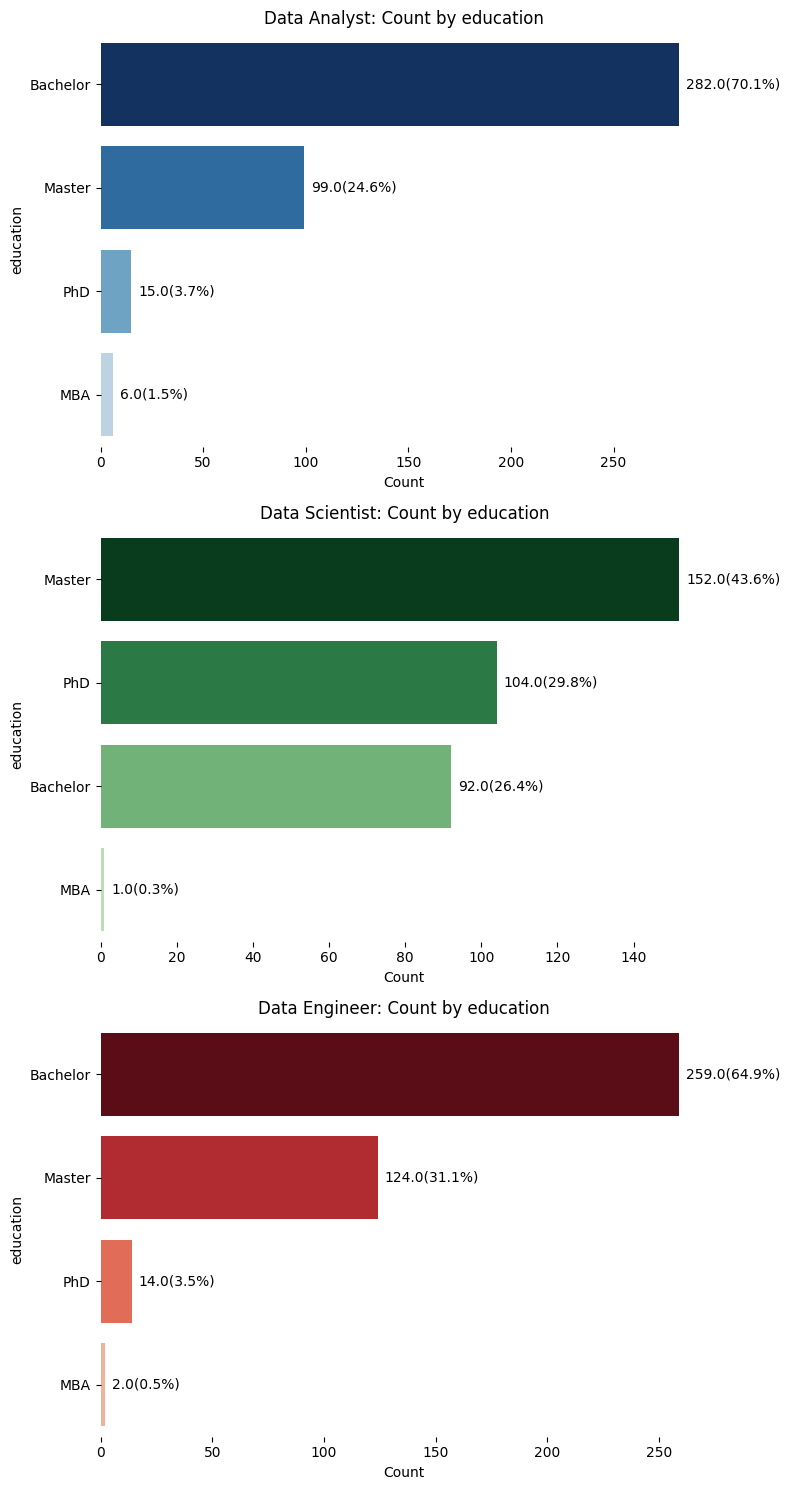

In [18]:
plot_multiple_bars(columns_education,category='job_group',figsize=(8,15),count_percentage=True)

## Skills

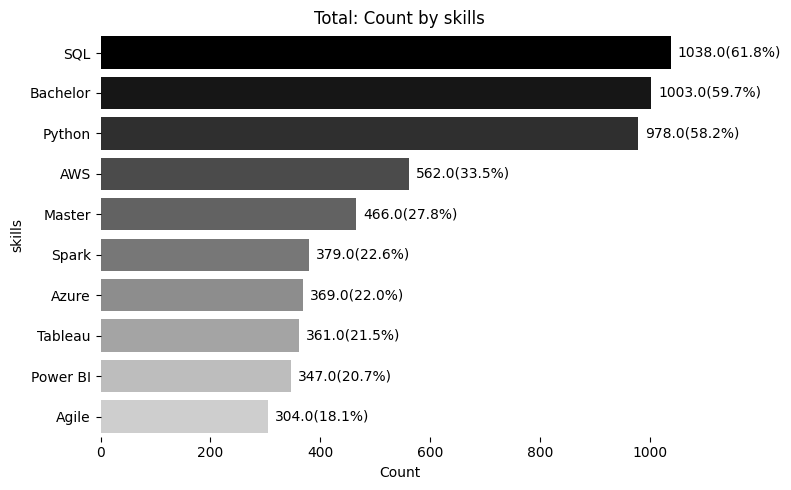

In [19]:
columns_skills = ['skills',]

plot_multiple_bars(columns_skills,figsize=(8,5),list_values=True,count_percentage=True)

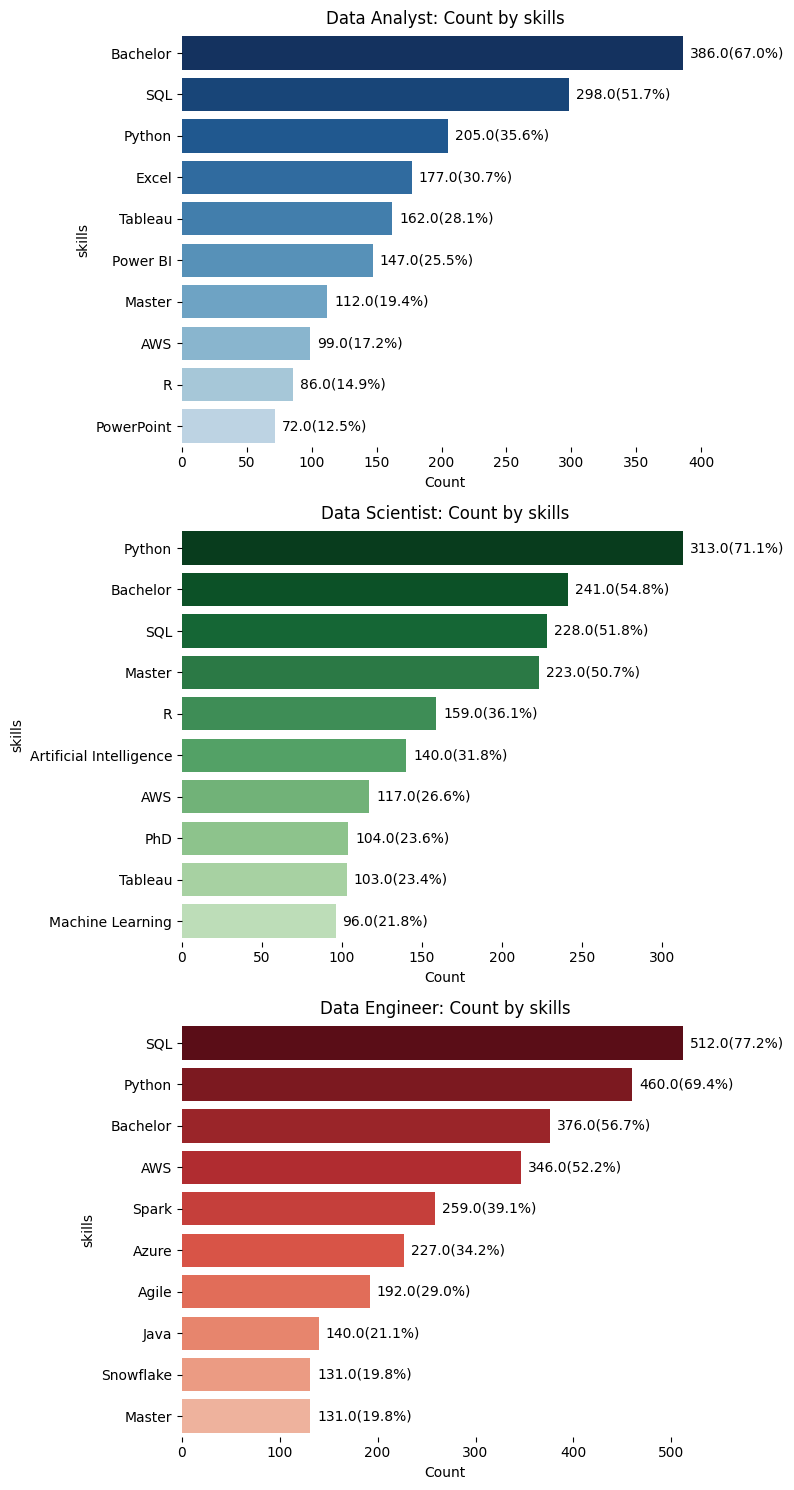

In [20]:
plot_multiple_bars(columns_skills,category='job_group',figsize=(8,15),list_values=True,count_percentage=True)

## Programming language

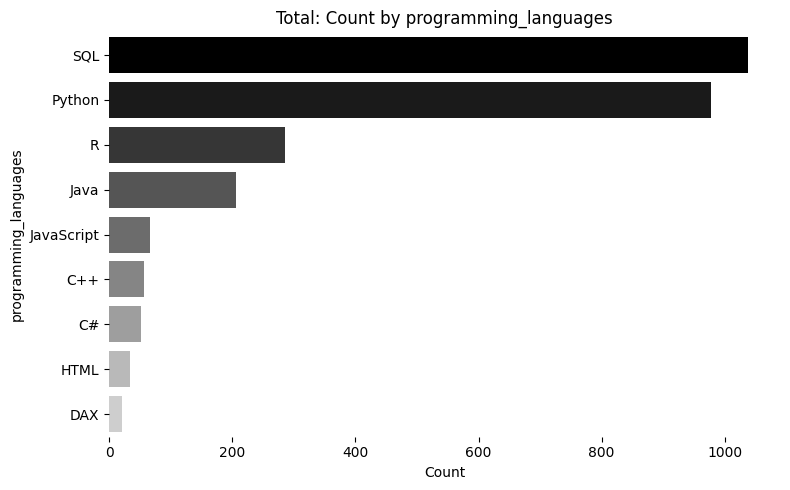

In [21]:
column_programming_language = ('programming_languages',)

plot_multiple_bars(column_programming_language,list_values=True,top_10=True,figsize=(8,5))

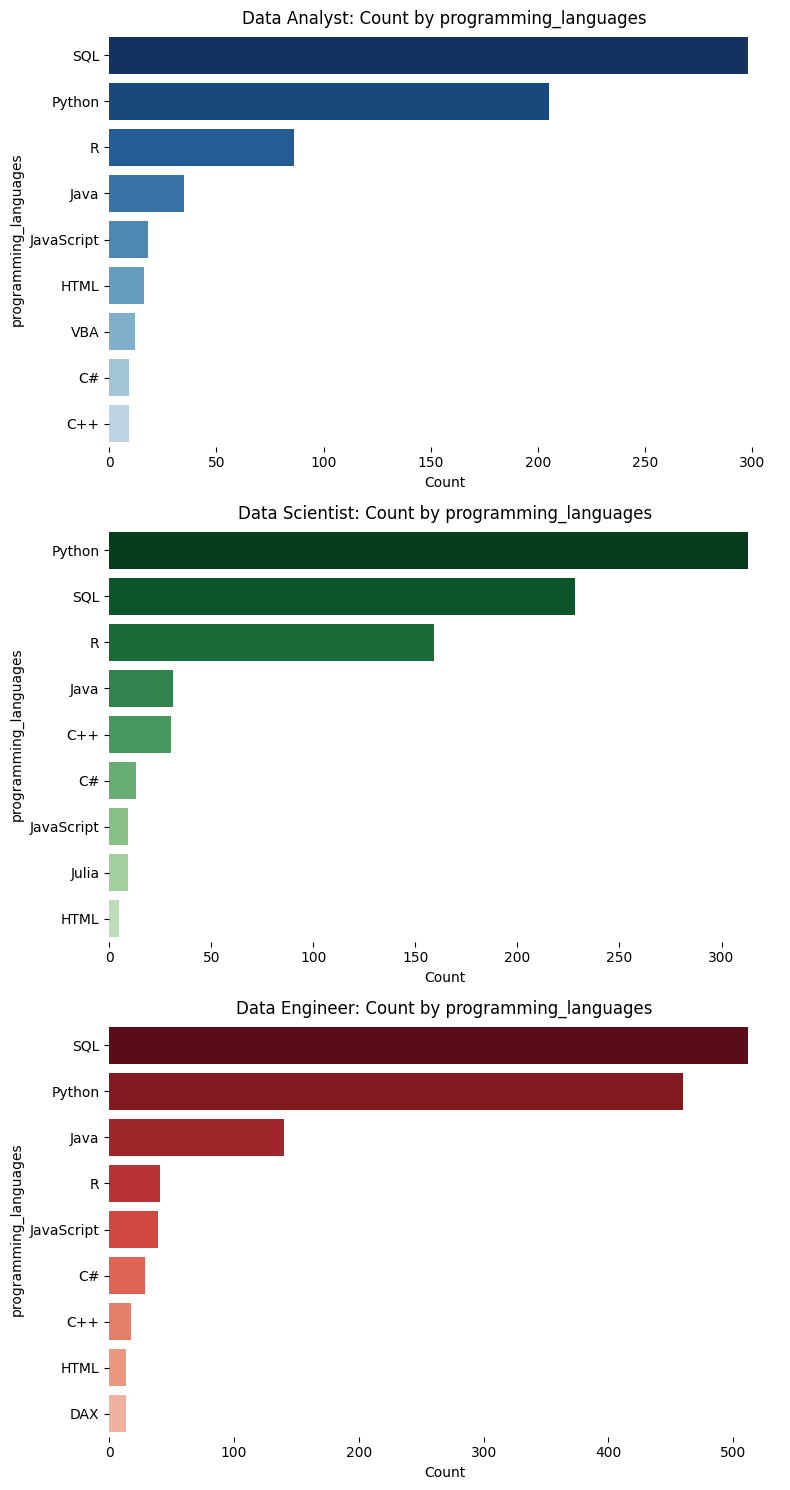

In [22]:
plot_multiple_bars(column_programming_language,category='job_group',list_values=True,top_10=True,figsize=(8,15))

## Languages

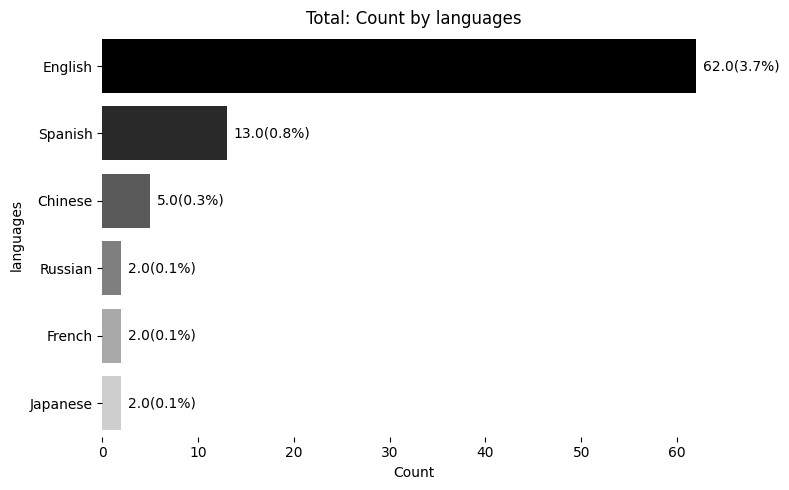

In [24]:
column_languages = ('languages',)

plot_multiple_bars(column_languages,list_values=True,figsize=(8,5),count_percentage=True)

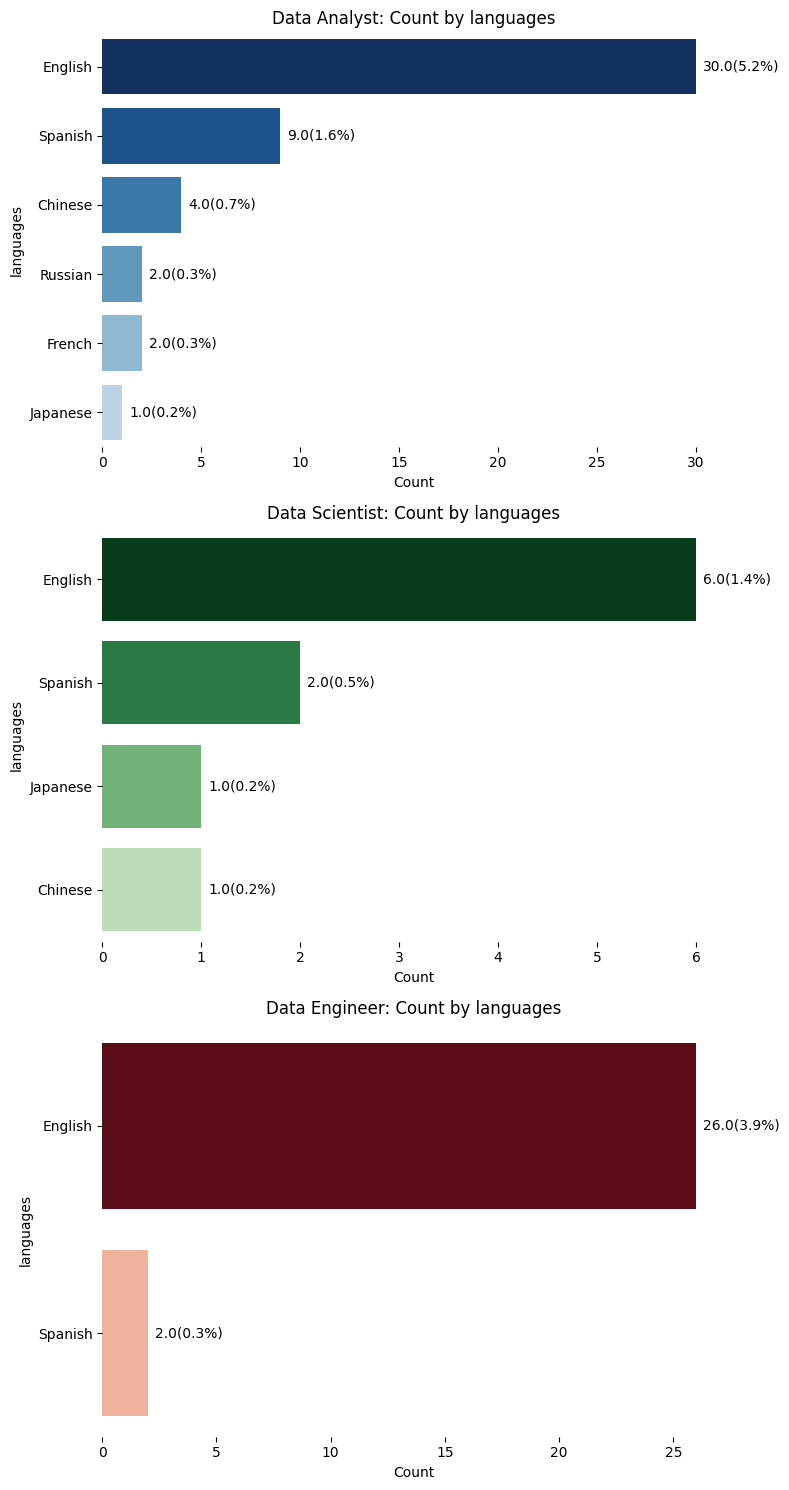

In [25]:
plot_multiple_bars(column_languages,category = 'job_group',list_values=True,figsize=(8,15),count_percentage=True)

# Salary

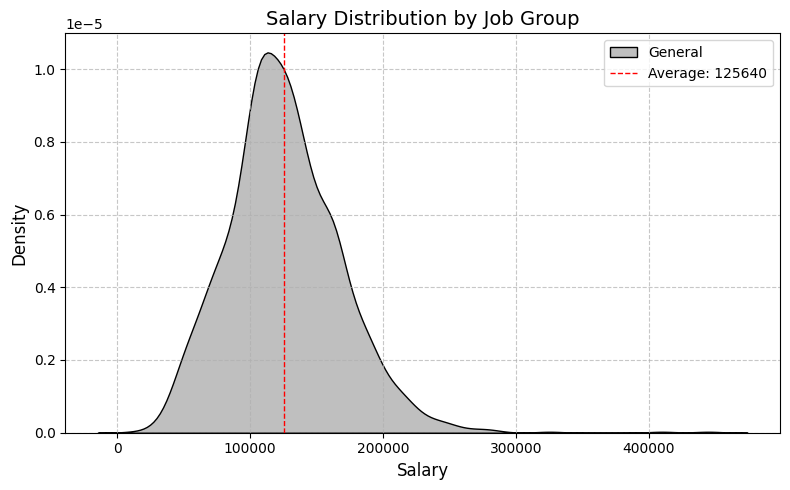

In [31]:
def plot_salary_kde(df,job_group_column=None,salary_column='salary',**kwargs):

    plt.figure(figsize=(8,5))

    if job_group_column:
        for job_group in df[job_group_column].unique():
            group_data = df[df[job_group_column] == job_group]

            mean_salary = group_data[salary_column].mean()

            sns.kdeplot(group_data[salary_column], shade=True, label=job_group, **kwargs)

            plt.axvline(mean_salary,color='red',linestyle='dashed',linewidth=1,label=f'Average:{mean_salary:.0f}')

            plt.title('Salary Distribution', fontsize = 14)

    else:

        mean_salary = df[salary_column].mean()

        sns.kdeplot(df[salary_column],shade=True,color='black',label='General', **kwargs)

        plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1, label=f'Average: {mean_salary:.0f}')


        plt.title('Salary Distribution by Job Group', fontsize=14)

    
    plt.xlabel('Salary',fontsize=12)
    plt.ylabel('Density',fontsize=12)
    plt.legend(title=job_group_column if job_group_column else None)
    plt.grid(True,linestyle='--',alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_salary_kde(df,salary_column='mean_salary')

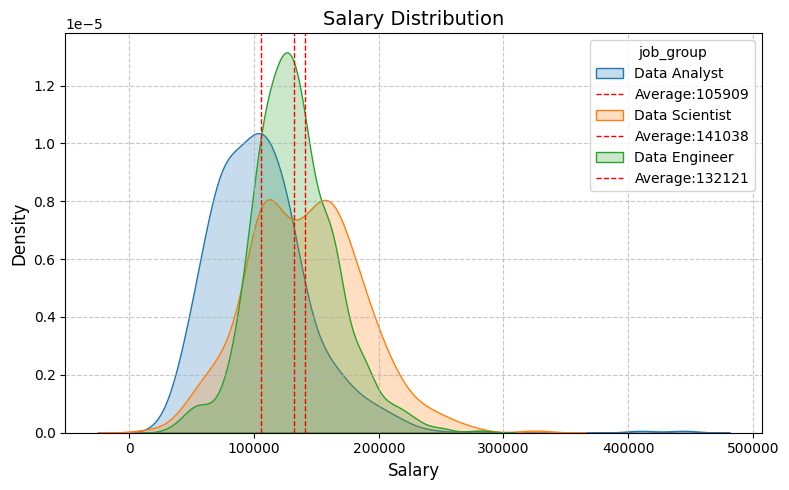

In [32]:
plot_salary_kde(df,job_group_column='job_group',salary_column='mean_salary')

## Location

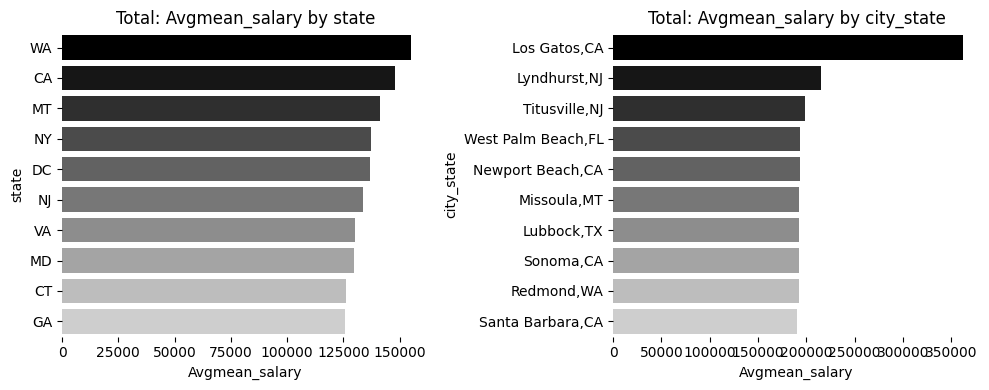

In [37]:
plot_multiple_bars(columns_location,figsize=(10,4),top_10=True,aggregate_column='mean_salary')

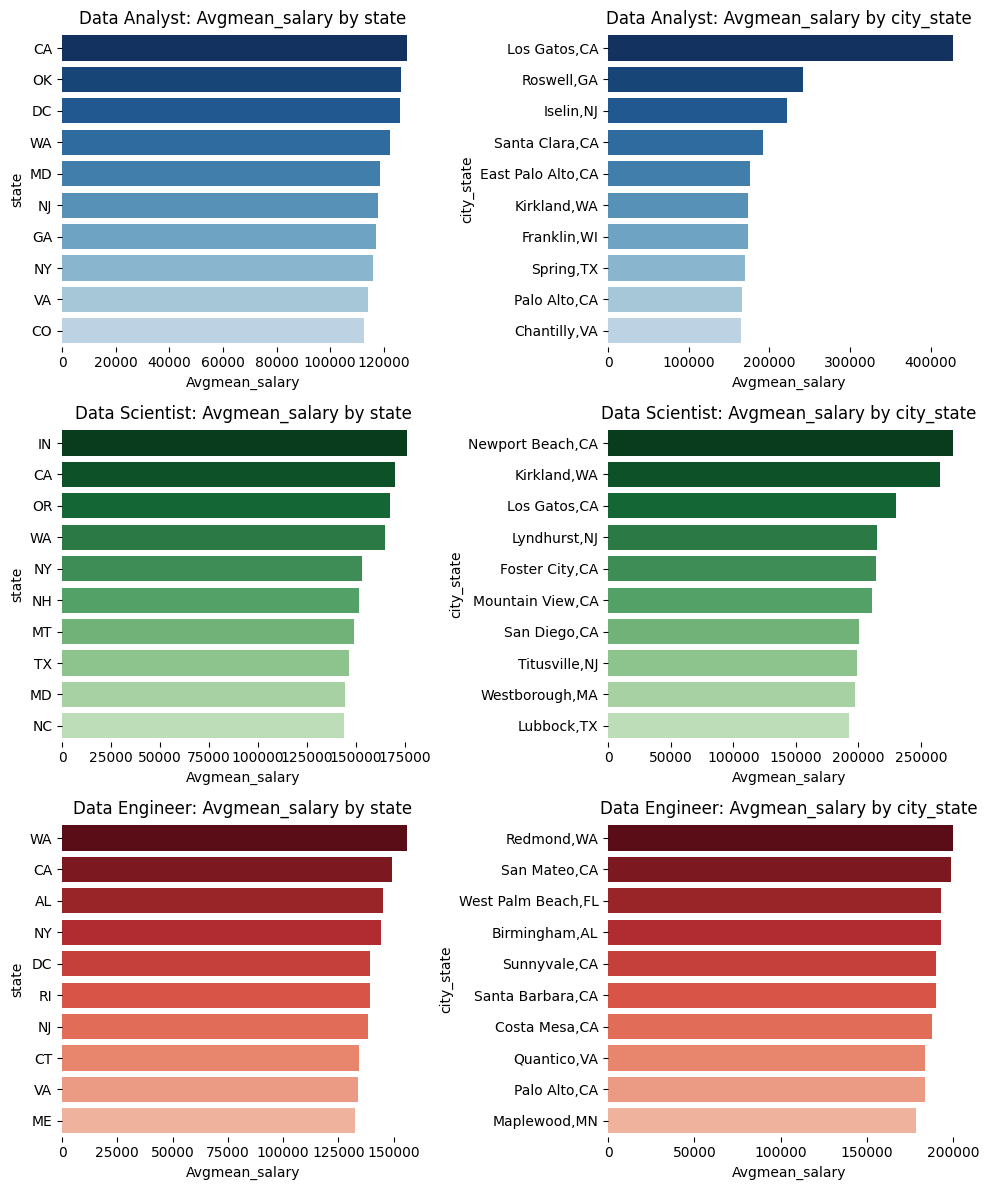

In [38]:
plot_multiple_bars(columns_location,category='job_group',figsize=(10,12),top_10=True,aggregate_column='mean_salary')

## Level

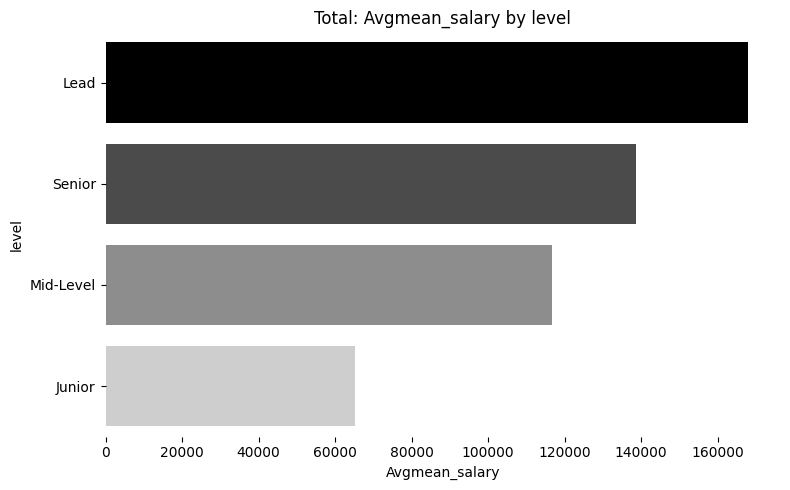

In [39]:
plot_multiple_bars(columns_level,figsize=(8,5),aggregate_column='mean_salary')

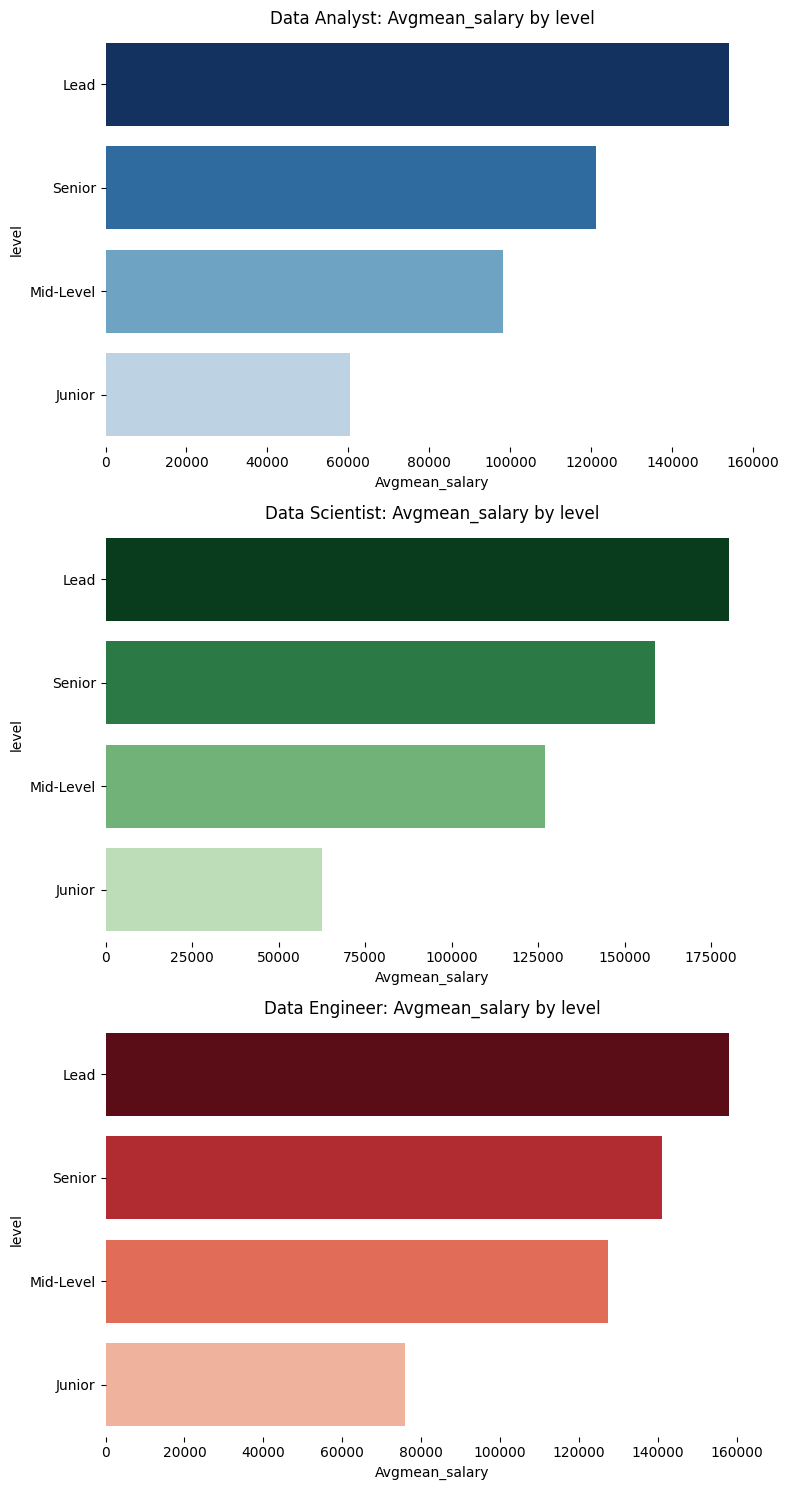

In [40]:
plot_multiple_bars(columns_level,category='job_group',figsize=(8,15),aggregate_column='mean_salary')

## Education

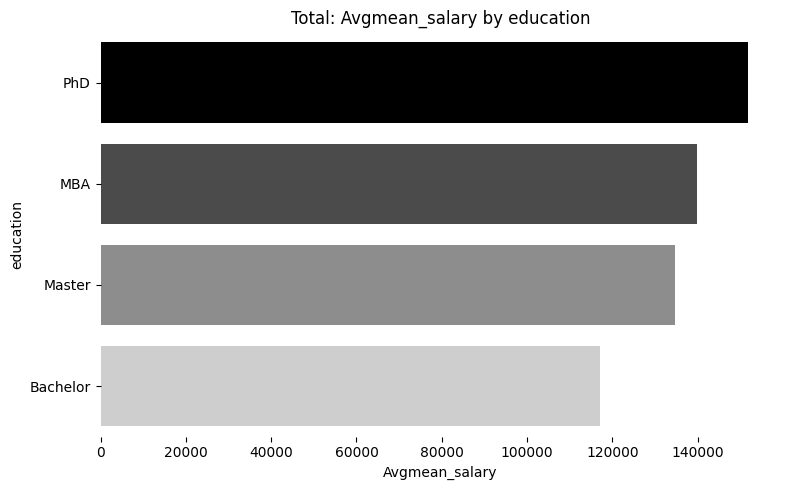

In [41]:
plot_multiple_bars(columns_education,figsize=(8,5),aggregate_column='mean_salary')

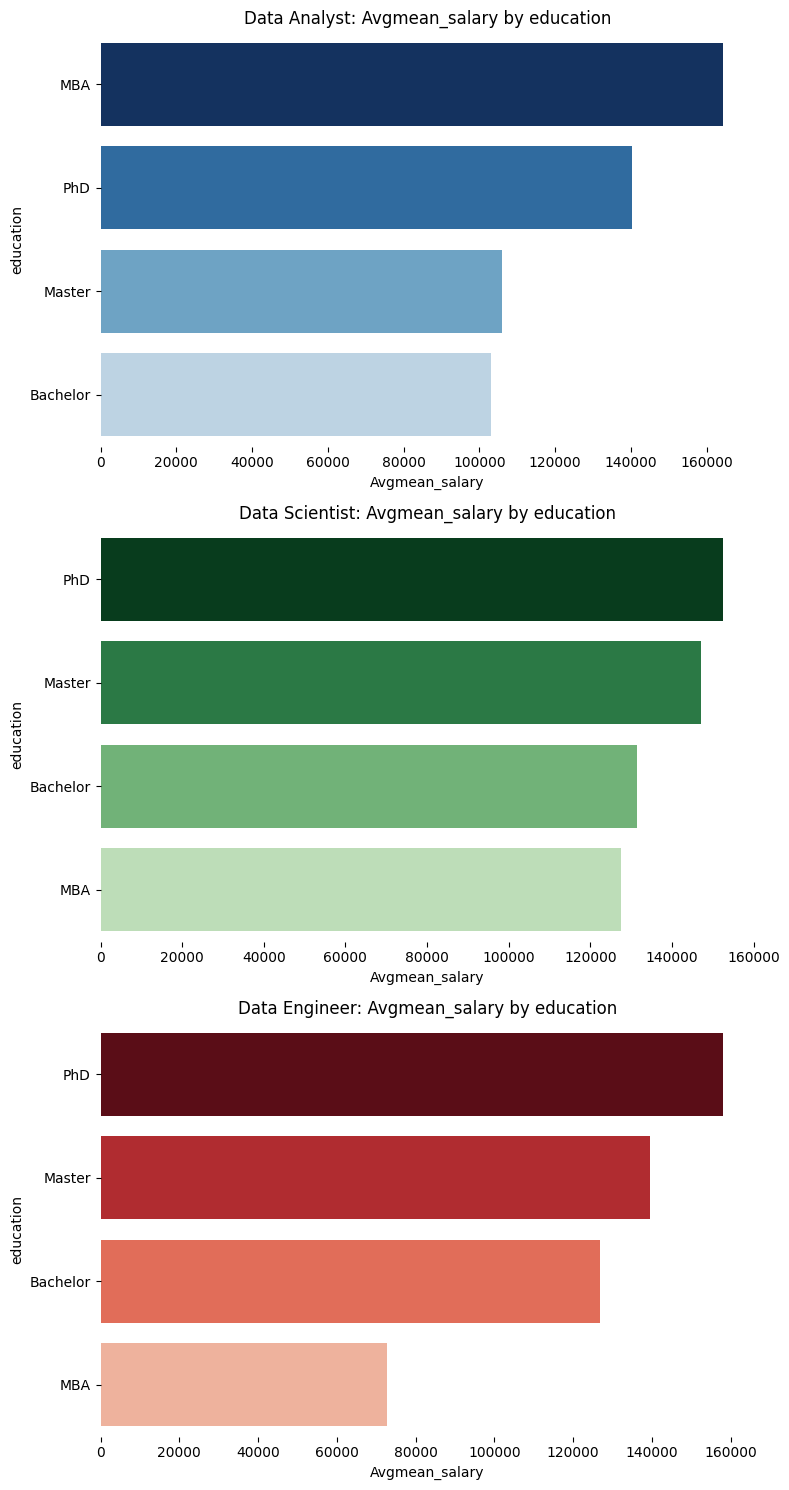

In [43]:
plot_multiple_bars(columns_education,category='job_group',figsize=(8,15),aggregate_column='mean_salary')

## Experience

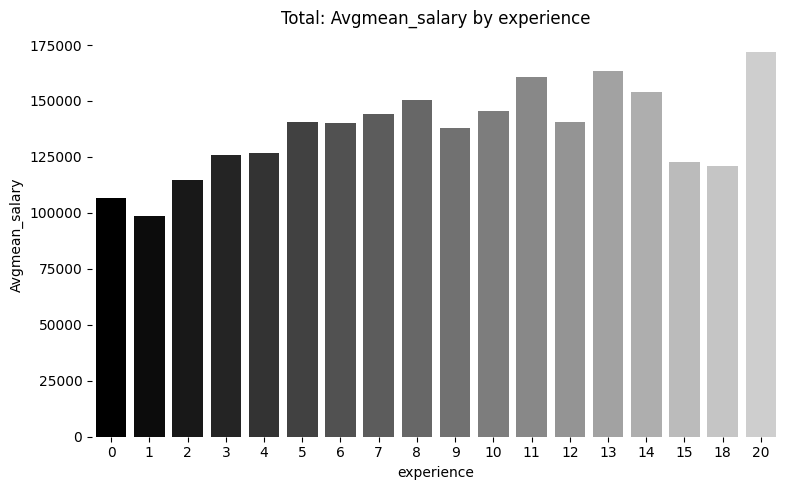

In [44]:
plot_multiple_bars(columns_experience,figsize=(8,5), x_y= True, aggregate_column='mean_salary')

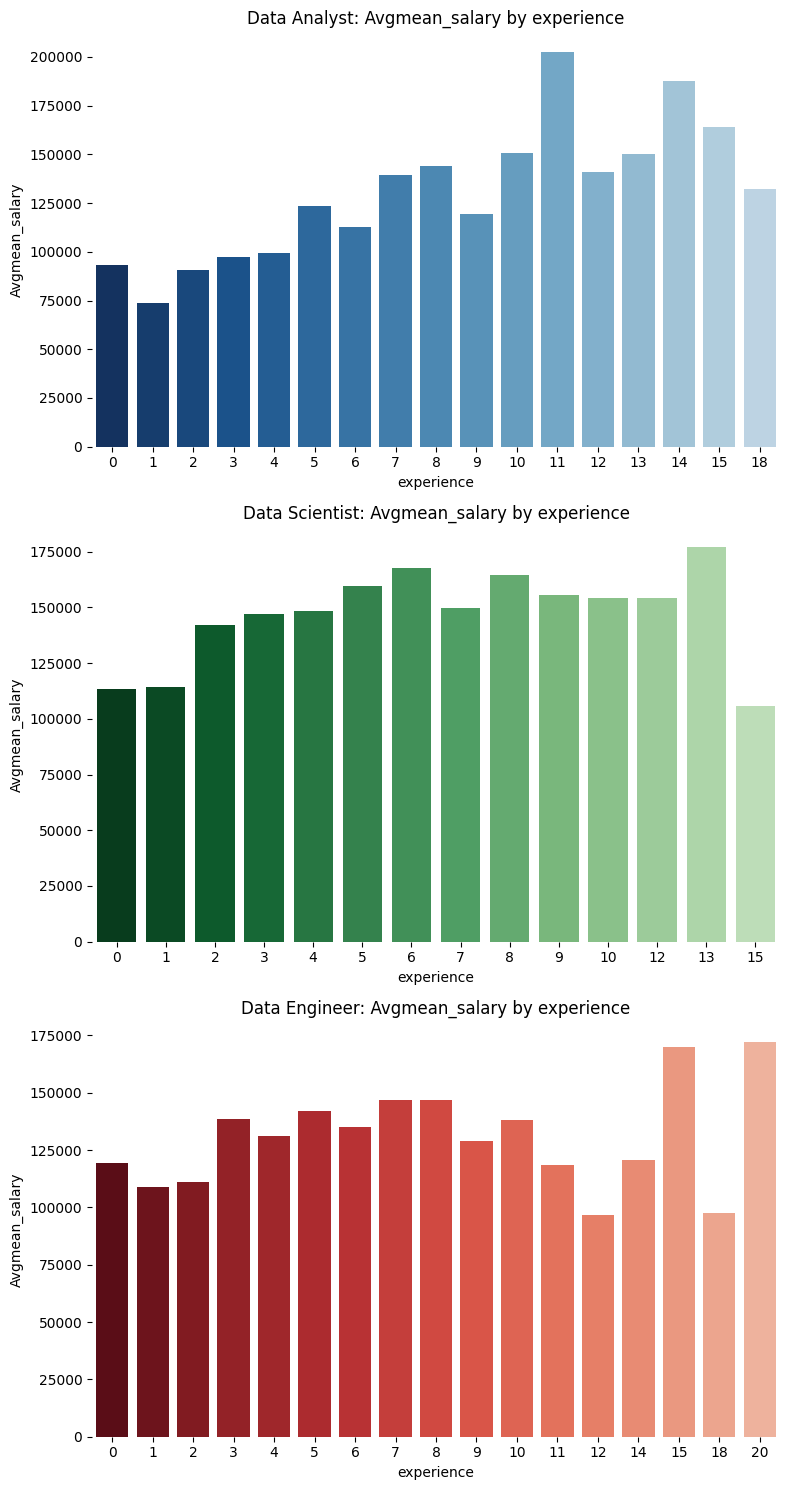

In [ ]:
plot_multiple_bars(columns_experience,category='job_group',figsize=(8,15), x_y= True, aggregate_column='mean_salary')

## Skills

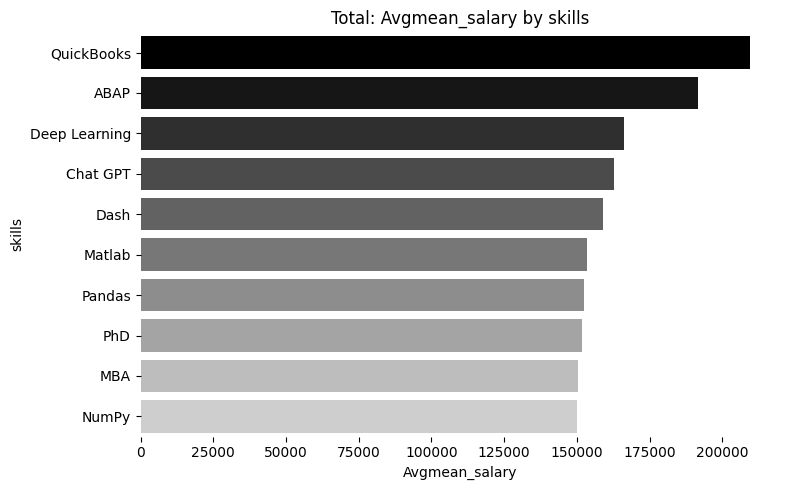

In [46]:
plot_multiple_bars(columns_skills,figsize=(8,5), list_values=True, top_10=True, aggregate_column='mean_salary')

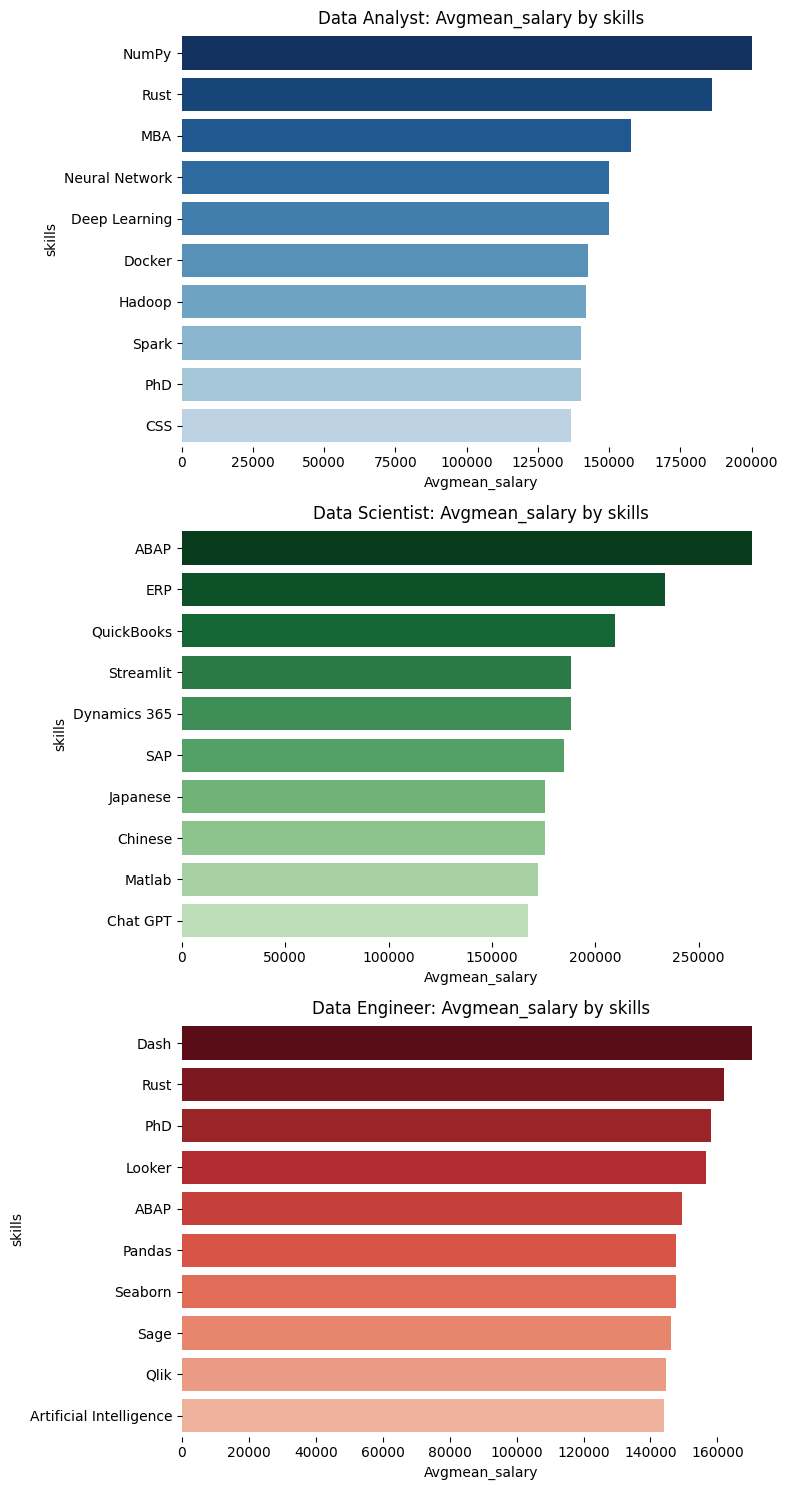

In [48]:
plot_multiple_bars(columns_skills,category='job_group',figsize=(8,15), list_values=True, top_10=True, aggregate_column='mean_salary')

## Programming languages

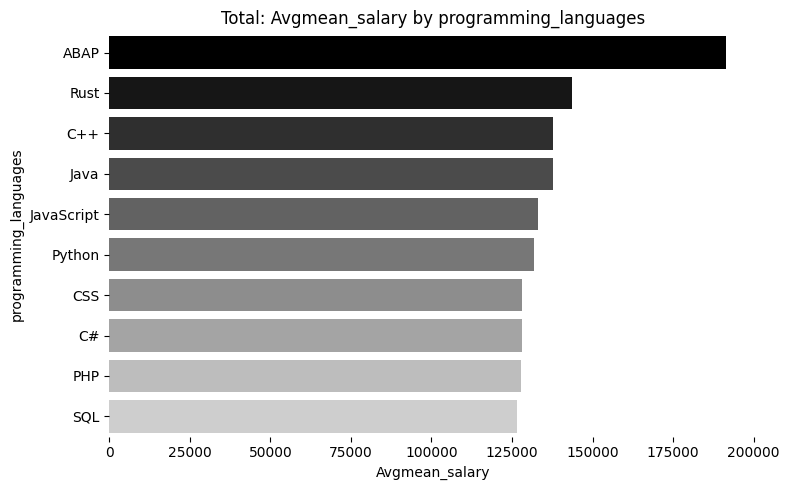

In [49]:
plot_multiple_bars(column_programming_language,figsize=(8,5), list_values=True, top_10=True, aggregate_column='mean_salary')

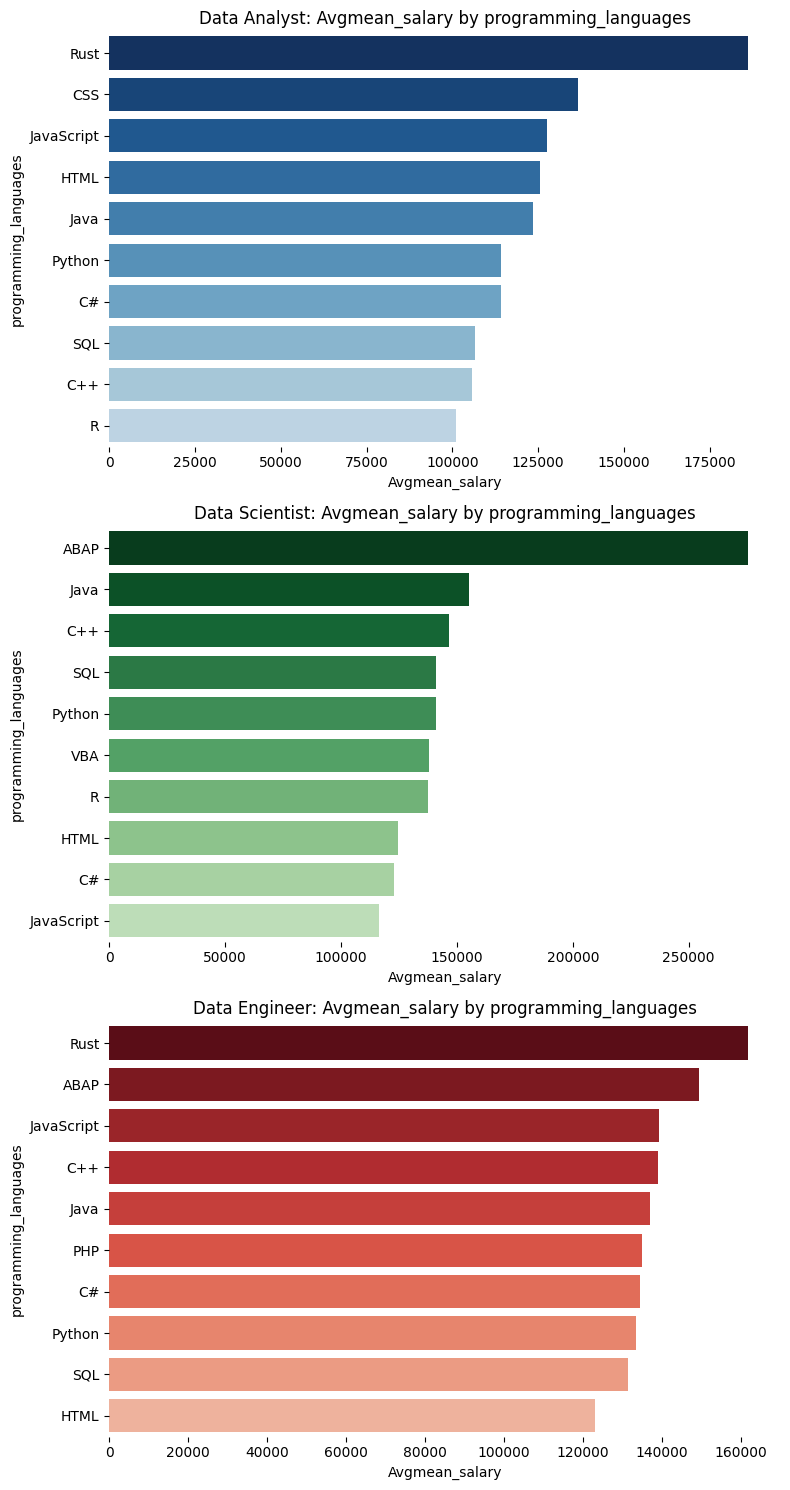

In [50]:
plot_multiple_bars(column_programming_language,category='job_group',figsize=(8,15), list_values=True, top_10=True, aggregate_column='mean_salary')

## Languages

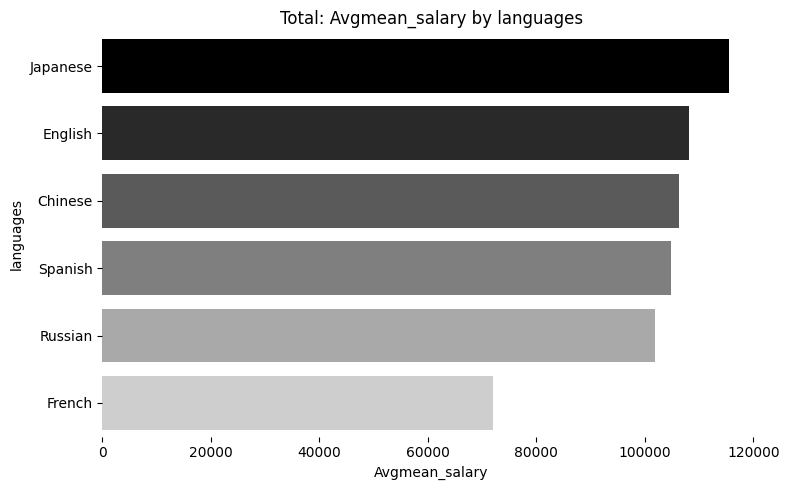

In [51]:
plot_multiple_bars(column_languages,figsize=(8,5), list_values=True, top_10=True, aggregate_column='mean_salary')

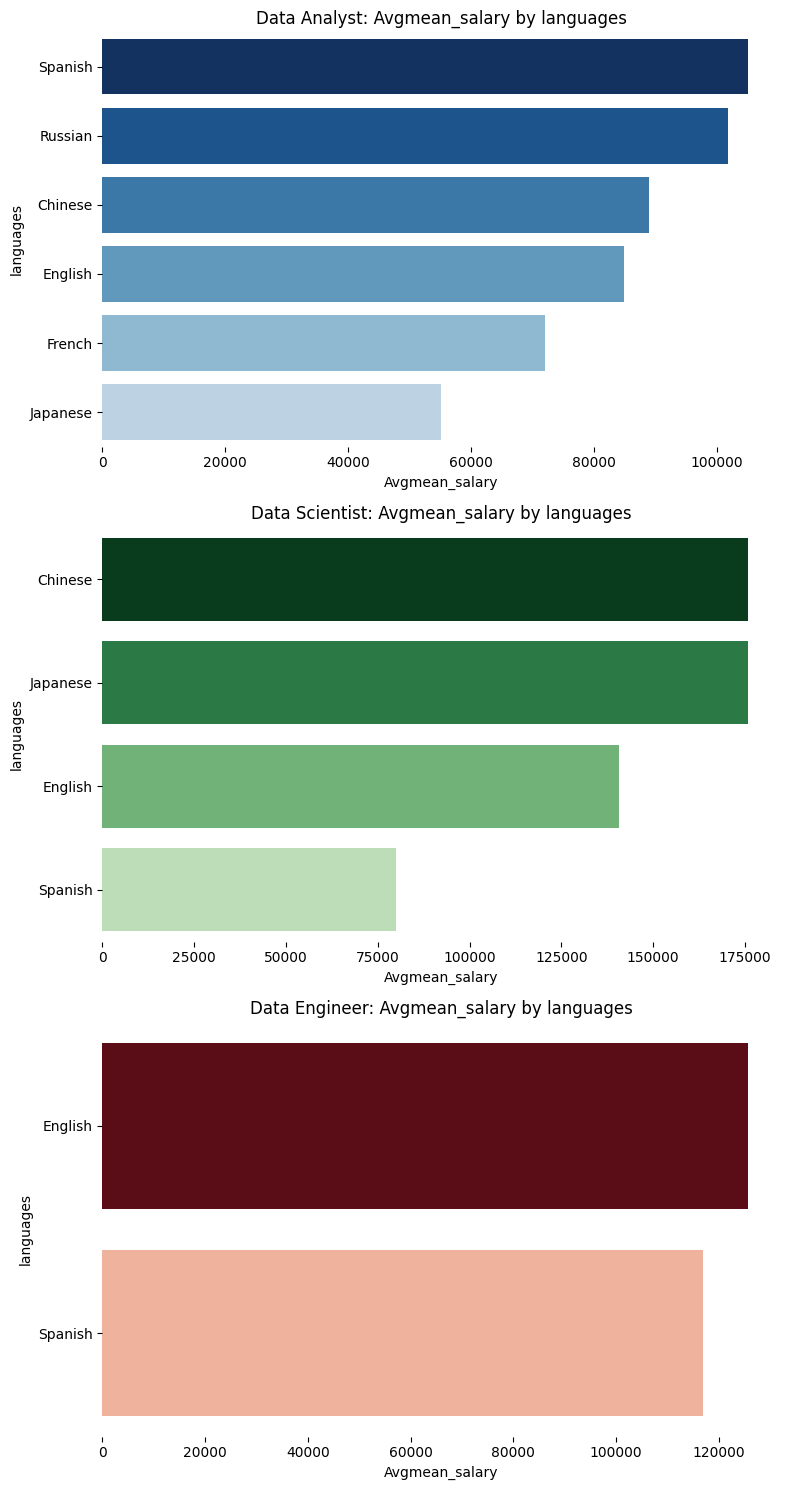

In [52]:
plot_multiple_bars(column_languages,category='job_group',figsize=(8,15), list_values=True, top_10=True, aggregate_column='mean_salary')

# Remote trend

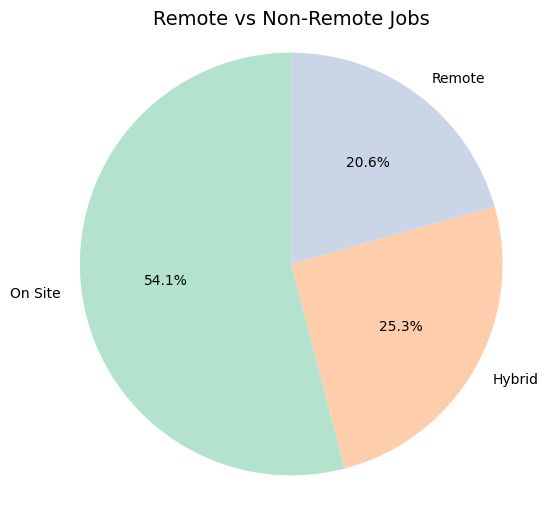

In [53]:
def plot_remote_distribution(df,column_name,title,category=None,figsize=(6,6)):

    def create_pie(data,chart_title,ax):
        counts = data.value_counts()
        ax.pie(
            counts,
            labels=counts.index,
            autopct='%1.1f%%',
            colors=plt.cm.Pastel2.colors,
            startangle=90
        )
        ax.set_title(chart_title,fontsize=14)
        ax.axis('equal')
    
    if category:
        unique_categories = df[category].unique()
        n_categories = len(unique_categories)

        fig,axes = plt.subplots(n_categories,1,figsize=figsize)
        if n_categories == 1:
            axes = [axes]

        for i, job_group in enumerate(unique_categories):
            df_grouped = df[df[category] == job_group]
            title_grouped = f"{job_group}:{title}"
            create_pie(df_grouped[column_name], title_grouped, axes[i])

        plt.tight_layout()
        plt.show()

    else:

        fig, ax = plt.subplots(figsize=figsize)
        create_pie(df[column_name],title,ax)
        plt.show()

plot_remote_distribution(df=df,column_name='remote',title='Remote vs Non-Remote Jobs')

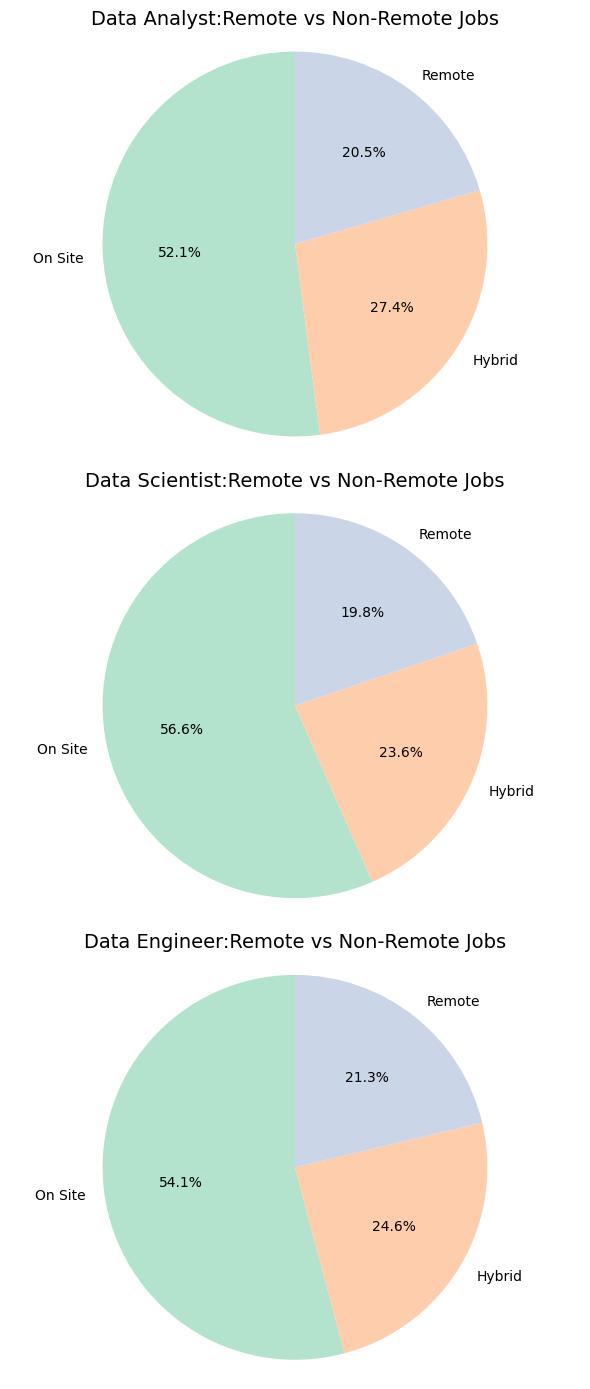

In [54]:
plot_remote_distribution(df=df,column_name='remote',title='Remote vs Non-Remote Jobs', figsize=(6,14),category='job_group')